# ENPM 673 - Perception for Autonomous Robots
### Rohan Maan, Jay Prajapati, Dr. Samer Charifa, Dr. Tommy Chang

## Introduction to OpenCV

OpenCV or Open Source Computer Vision Library is an open source computer vision and machine learning library that supports a couple of progamming languages namely: Python, Java, C and C++. It is BSD-licensed, so it is easy to use by business everywhere.

##  Reading the Image

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
path_to_folder = "ENPM673/tutorials/"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials


In [1]:
# Importing Dependencies
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# cv2.imshow() is disabled in Colab,
# because it causes Jupyter sessions to crash
# hence, we will use this instead
from google.colab.patches import cv2_imshow

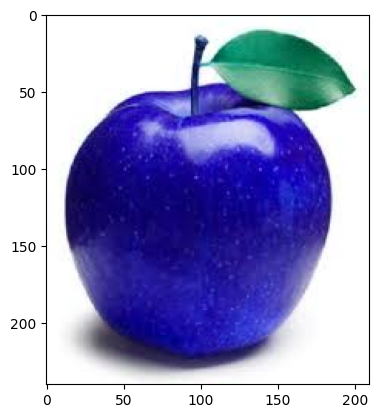

In [4]:
image_path = "assets/apple.jpeg"
img = cv.imread(image_path)               #Read the image and store it into a variable
plt.imshow(img)                           #Ploting the image using matplotlib



Notice how the apple looks weird?

This is because OpenCV utilize the BGR format as it was the popular format for camera manufacturer back in the day when it was written, and for historical reasons we have to live with it. Before we fix this in a second, let us first examine the `cv.imread()` function.

`cv.imread()` has two arguments:

1. Image Path
2. The 3 parameters that the image should be read. They can also be altneratively represented as integers:
    
    <b>-1</b><br>
    `cv.IMREAD_COLOR` (<b>Default Tag</b>) - neglects the image transparency, mostly for 8-bit images that don’t have the alpha channel.
    
    <b>0</b><br>`cv.IMREAD_GRAYSCALE` — responsible for loading our images in grayscale.
    
    <b>1</b><br>`cv.IMREAD_UNCHANGED` — loads an image using alpha channel.
    
Ok, now that we understand the image reading function, let's try to fix the weird colors. To do this, we are going to Convert it to RGB format using the `cvtColor()` function in OpenCV, using the `cv.COLOR_BGR2RGB` as the parameter.
    
    



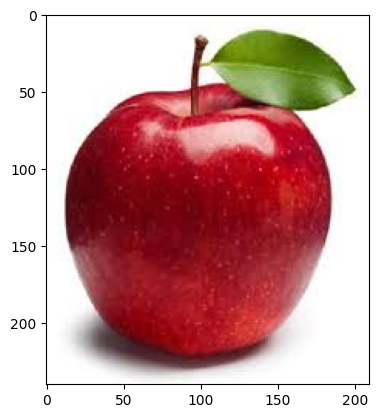

In [5]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

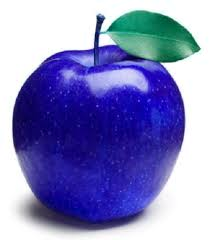

In [6]:
cv2_imshow(img_rgb)
cv.waitKey()
cv.destroyAllWindows()
# You should be able to see a window open showing the image (Press any key on the window to close it)
# You can see that the image is back to BGR format because 'cv.imshow()' converts the image to RGB format and displays it.


## Examine the Image

*   List item
*   List item



Let's take a closer look at how images are stored


In [7]:
print(img_rgb.shape)

(240, 210, 3)


As we can see the image is a numpy n-th dimensional array with its shape in this case being `(240,210,3)`. This is because computers read images in term of pixels. Note that OpenCV stores the y pixels as rows, and x pixels as columns. So in this case image, this is a `240 x 210` picture. The `3` represent the BGR or RGB value inside of each pixel, expressed in form of an array.

The 2D dimensions are 240 pixels in high, 210 pixels wide and has 3 channels
A good way to remember this is, an image shape will always be Number of Rows X Number of Columns X Number of Channels

<Br>Let's now close examine the img that we just manipulated.

In [8]:
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)

Image type:  <class 'numpy.ndarray'>
Image data type:  uint8


## Converting Image Pixels from Integers to Floats

When you read an image using OpenCV (cv2 module) in Python, by default, the pixel values are represented as **integers**. However, you can convert the pixel values to float by explicitly specifying the data type when reading the image.

In [9]:
# Read the image as a float
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE).astype(float)

In [10]:
# Print the shape of the image array
print("Image shape:", image.shape)

Image shape: (240, 210)


In [11]:
# Print the first few rows and columns of the image array
print("Image array (first 5 rows and columns):\n", image[:5, :5])

Image array (first 5 rows and columns):
 [[255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255.]]


Let's try generating the

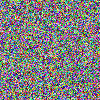

In [12]:
# Define the size of the random matrix
rows = 100
cols = 100

# Create a random RGB image with float values between 0 and 255
random_rgb_image = np.random.uniform(0, 255, size=(rows, cols, 3))

# Visualize the random RGB image using OpenCv
cv2_imshow(random_rgb_image)
cv.waitKey()
cv.destroyAllWindows()


In [13]:
# Print the first few rows and columns of the image array
print("Image array (first 5 rows and columns):\n", random_rgb_image[:5, :5])

Image array (first 5 rows and columns):
 [[[225.46478412 114.55259264 174.57835408]
  [199.62994775 149.61576684  30.76917814]
  [ 35.27696149  27.54779065 199.37235538]
  [ 26.96318961  42.13670149 117.18361206]
  [ 63.11541577 171.68681904  60.09644657]]

 [[242.26074135  50.24687282 108.28704825]
  [ 80.83023802 212.16353895 167.44986548]
  [173.7252268  219.13285002  46.72391724]
  [ 22.43438613 218.35246459 167.55299735]
  [193.11391326 220.93308297  92.82171198]]

 [[101.01788146 182.70566377 186.81877388]
  [245.16512144 159.56077926 242.365185  ]
  [ 25.37496218  10.71531334  12.43209808]
  [121.90578025 244.08733101  43.9954075 ]
  [230.55841332  96.618566   106.0150672 ]]

 [[ 60.74852368 159.57690167 185.78218726]
  [168.53905503  64.75507332  30.88749425]
  [185.51875355 242.18583482  29.41182983]
  [ 16.89821305  83.58098508 161.45562789]
  [200.45442512 148.58624215  16.81445416]]

 [[242.2005064  242.89698902  80.55249963]
  [155.51908905   1.11295276  74.55276684]
  [19

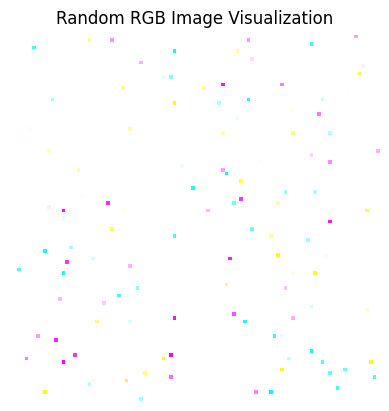

In [14]:
# Visualize the random RGB image using matplotlib
# plt.imshow(random_rgb_image.astype(np.uint8))  # Convert to uint8 for display
plt.imshow(random_rgb_image)
plt.title('Random RGB Image Visualization')
plt.axis('off')  # Hide axes
plt.show()

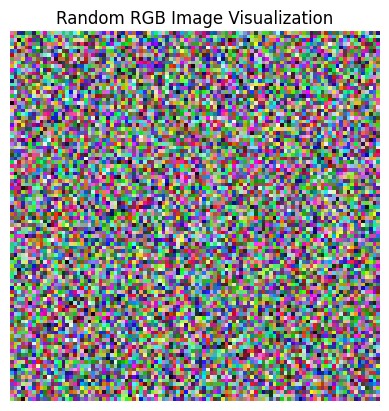

In [15]:
# Visualize the random RGB image using matplotlib
plt.imshow(random_rgb_image.astype(np.uint8))  # Convert to uint8 for display
plt.title('Random RGB Image Visualization')
plt.axis('off')  # Hide axes
plt.show()

In [16]:
# Print the first few rows and columns of the image array
print("Image array (first 5 rows and columns):\n", random_rgb_image[:5, :5])

Image array (first 5 rows and columns):
 [[[225.46478412 114.55259264 174.57835408]
  [199.62994775 149.61576684  30.76917814]
  [ 35.27696149  27.54779065 199.37235538]
  [ 26.96318961  42.13670149 117.18361206]
  [ 63.11541577 171.68681904  60.09644657]]

 [[242.26074135  50.24687282 108.28704825]
  [ 80.83023802 212.16353895 167.44986548]
  [173.7252268  219.13285002  46.72391724]
  [ 22.43438613 218.35246459 167.55299735]
  [193.11391326 220.93308297  92.82171198]]

 [[101.01788146 182.70566377 186.81877388]
  [245.16512144 159.56077926 242.365185  ]
  [ 25.37496218  10.71531334  12.43209808]
  [121.90578025 244.08733101  43.9954075 ]
  [230.55841332  96.618566   106.0150672 ]]

 [[ 60.74852368 159.57690167 185.78218726]
  [168.53905503  64.75507332  30.88749425]
  [185.51875355 242.18583482  29.41182983]
  [ 16.89821305  83.58098508 161.45562789]
  [200.45442512 148.58624215  16.81445416]]

 [[242.2005064  242.89698902  80.55249963]
  [155.51908905   1.11295276  74.55276684]
  [19

With a dtype of `uint8`(8-bit unsigned integer arrays, the max value is `255`, and the min value is `0`.

More about image data types can be found here: https://scikit-image.org/docs/stable/user_guide/data_types.html

## Exercise #1

### Reading an image
- Read the image 'umd.jpg' and show the image in RGB format using matplotlib and appropriate OpenCV functions

In [17]:
## Your code here
## Make sure to name the variables something different from the above as it might effect other parts of notebook


- Print the shape and data type of the image  

In [18]:
## Your code here


- Read the image 'umd.jpg' as grayscale image and display it

In [19]:
## Your code here


##  Drawing Shapes



### a. Drawing a Line


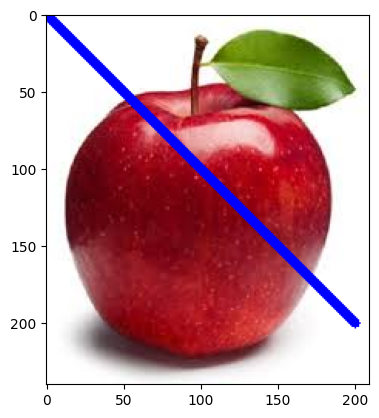

In [20]:
line_img = img_rgb.copy()                           # Make a copy of the image
cv.line(line_img,(0,0),(200,200),(0,0,255),5)       # Drawing a diagonal blue line with thickness of 5 px
plt.imshow(line_img)                                # show the image

There are 4 arguments in this tutorial for the cv.line function that you have to worry about, which will mutate the image variable. For more parameters, feel free to refer to the drawing documentation
https://docs.opencv.org/3.4.1/d6/d6e/group__imgproc__draw.html


1. `img_rgb` , which in this case represents the image we would like to draw our line on
2. `(0,0)`, the starting location of our line with both `x` and `y` equals 0
3. `(200,200)`, the end location of our line also with both `x` and `y` equals 200
4. `((0,255,0),5)`, the color of our line `(0,255,0)` and the thickness of the line in `5` px

Please note that `x` here is the number of columns and `y` is the number of rows. You can think of it as co-ordinate system with top left point as the origin.

### b. Drawing a rectangle



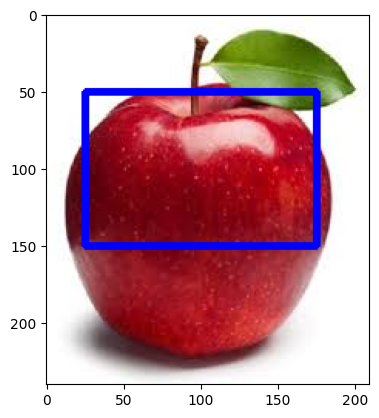

In [21]:
rectangle_img = img_rgb.copy()
cv.rectangle(rectangle_img,(25,50),(175,150),(0,0,255),3)
plt.imshow(rectangle_img)

For the cv.rectangle method, here are the parameters meant.

1. `img_rgb`, the image we would like to draw our rectangle on
2. `(25,50)`, pt1, vertex of the rectangle (Top left corner)
3. `(175,150)`, pt2, vertext of the rectangle of the pt1 (bottom left corner)
4. `(0,0,255)`, the RGB value of our rectangle color
5. `3` the thickness of our rectangle in pixels


### c. Drawing a circle



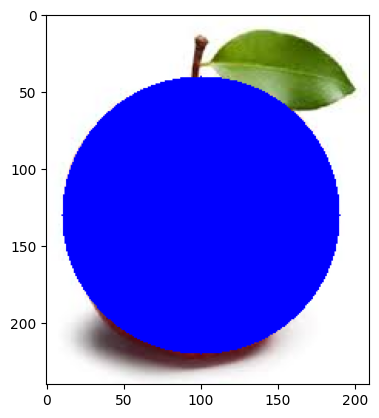

In [22]:
circle_img = img_rgb.copy()
cv.circle(circle_img,(100,130), 90, (0,0,255), -1)
plt.imshow(circle_img)

1. `img_rgb`, the image we would like to draw our rectangle on
2.  `(100,130)`, center location of where the circle starts
3. `90`, the radius of the cricle in pixels
4. `(0,0,255)`, the RGB value of our rectangle color, in this case it is blue
5. `-1` thickness of our circle, if NEGATIVE, then the circle is going to be filled


### d. Putting Text on Image

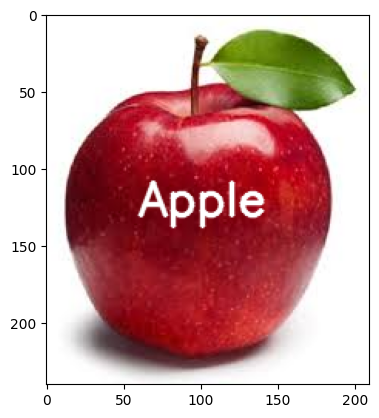

In [23]:
text_img = img_rgb.copy()
font = cv.FONT_HERSHEY_SIMPLEX #Setting the Font
textcolor = (255,255,255)
cv.putText(text_img,'Apple',(60,130), font, 1,textcolor,2,cv.LINE_AA)
plt.imshow(text_img)


Here are the functions for the cv.putText parameter:

1. `text_img`, the image where we are going to do our image manipulation on
2. `'Apple'`, the text string that you would like to put onto the image
3. `(60,130)`, the bottom-left corner of the text
4. `font`, in this case we set it as FONT_HERSHEY_SIMPLEX, to see more font options, check out https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11
5. `1`, the font scale, in this case is 1
6. `(255,255,255)`, the color of the text in rgb value
7. `2`,thickness of the text
8. `cv.LINE_AA`, line types, check it out here https://docs.opencv.org/3.4.1/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777

### e. Drawing a opaque square

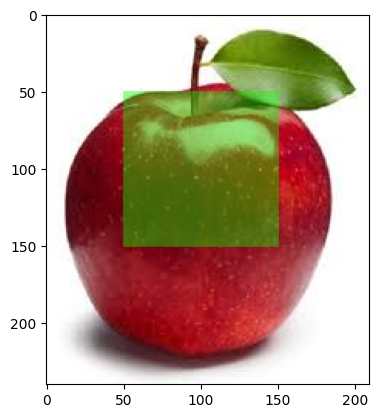

In [32]:
# Create a copy of the image to draw the transparent square
image_with_square = img_rgb.copy()

# Define the square coordinates and size
x, y = 50, 50  # Top-left corner coordinates
size = 100       # Size of the square
color = (0, 255, 0)  # Green color in BGR format
alpha = 0.4      # Transparency level (0-1)

# Create a transparent overlay
overlay = img_rgb.copy()
cv.rectangle(overlay, (x, y), (x + size, y + size), color, -1)
cv.addWeighted(overlay, alpha, image_with_square, 1 - alpha, 0, image_with_square)

# Display the image with the square
plt.imshow(image_with_square)

### f. Flipping an image

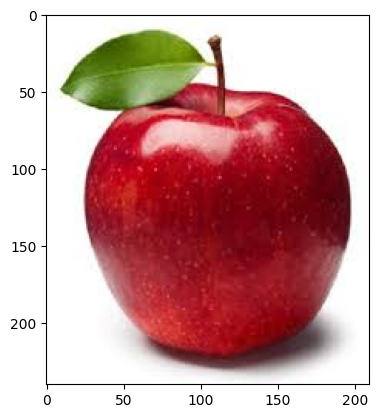

In [33]:
#flip horizontally
flip_horz_img = img_rgb.copy()
flip_horz_img = cv.flip(flip_horz_img,1)
plt.imshow(flip_horz_img)

Here are the parameters for `cv.flip()`:

1. `flip_horz_img`, the image where we are going to do our image manipulation on
2. `'1'`, flip code: A flag to specify how to flip the array; 0 means flipping around the x-axis (Horizontally) and positive value (for example, 1) means flipping around y-axis( Vertically). Negative value (for example, -1) means flipping around both axes.


## Saving the Image
Finally you save the Image using the cv.imwrite function. We can simpy demonstrate by saving the apple image with the text.



In [34]:
cv.imwrite("assets/Apple_with_Text.jpg",text_img)

True

## Exercise #2
### Drawing shapes and adding text
- Draw a red rectangle on the 'umd.jpg' image such that it covers the `M` in the image.
- Add the text `Maryland` above the rectangle.
- Save the image as 'umd_maryland.jpg'

In [35]:
## Your code here


### Flipping the image
- Flip the image `'umd.jpg'` about both axes and display it

In [36]:
## Your code here

## Grayscaling

#### Grayscaling is process by which an image is converted from a full color to shades of grey (black & white)

In OpenCV, many functions grayscale images before processing. This is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there is less information in the image.

### Let convert our color image to greyscale

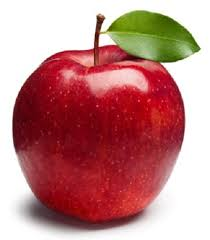

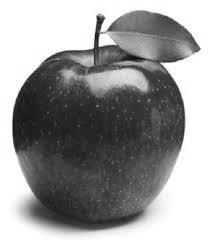

In [37]:
import cv2

# Load our input image
image = cv2.imread("assets/apple.jpeg")
# cv2.imshow('Original', image)
cv2_imshow(image)
cv2.waitKey()

# We use cvtColor, to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# cv2.imshow('Grayscale', gray_image)
cv2_imshow(gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

## Cropping & Masking

- You can access/modify a single pixel or ROI using Numpy indexing.
- Just like matrix indexing, `img[a, b]` refer to `a`-th row and `b`-th column.

In [38]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
img = cv2.imread('assets/messi.jpg', cv2.IMREAD_COLOR)

In [40]:
# Access a pixel value(BGR order)
# Remember that when we have to specify in rows , columns to access the pixel intensity
img[50, 235]

array([29, 24, 25], dtype=uint8)

### Slicing the image using NumPy indexing

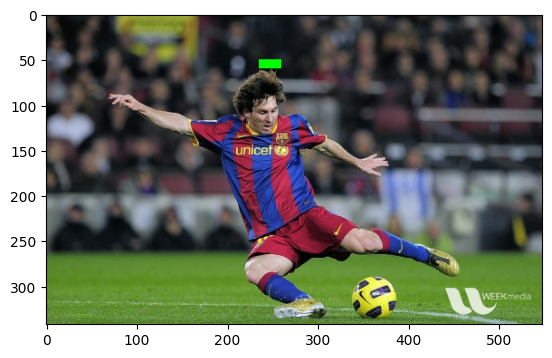

In [41]:
# Slicing
img[50:60, 235:260] = (0, 255, 0)

# You can implement the above code in a for loop and assign color to each pixel (slower method)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

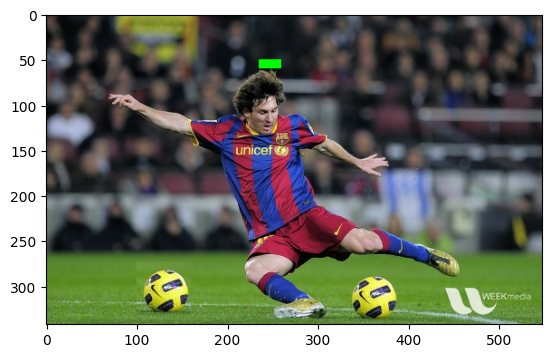

In [42]:
# ROI is obtained using Numpy indexing
#Crop the ball
ball = img[280:340, 330:390]

#Place the ball elsewhere
img[273:333, 100:160] = ball

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Masking Images

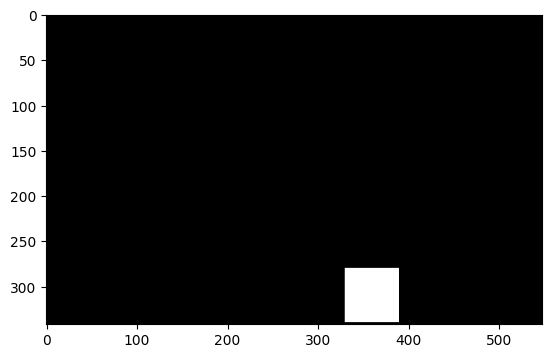

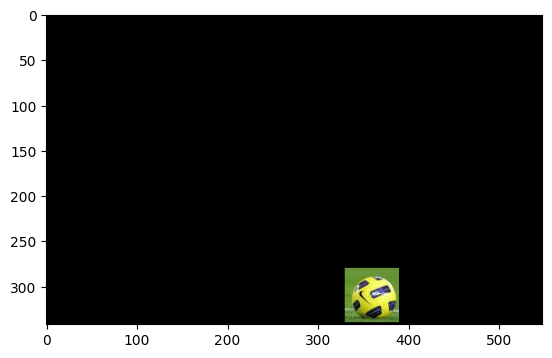

In [43]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[280:340, 330:390] = 255

# compute the bitwise AND using the mask
masked_img = cv2.bitwise_and(img,img,mask = mask)

plt.figure()
plt.imshow(mask, cmap='gray')
plt.figure()
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

## Exercise #3
- Crop the image umd.jpg such that the cropped image has only the `M` in it.

- Create a mask and apply the mask on the image 'umd.jpg' such that only `M` is seen in the masked image

## Convolution on Images

### 2D Convolution implementation from scratch

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [45]:
#Function for 2D convolution

def conv2D(input_image, kernel, padding = 0, stride = 1):
    assert (stride > 0), "stride cannot be less than 1"

    input_image = input_image.reshape(input_image.shape[0], input_image.shape[1], -1) # to handle gray scale images
    h, w, c = input_image.shape
    kernel_size = kernel.shape[0]
    if kernel_size % 2 == 0: #even kernel
        print("Error! The kernel cannot be even")
        return -1
    if kernel.shape[0] is not kernel.shape[1]:
        print("Error! The kernel is not square")
        return -1

    # create padded image
    padded_input_image = np.zeros((h + 2*padding,  w + 2*padding, c), dtype = np.uint8)
    padded_input_image[padding: padding + h, padding: padding + w, :] = input_image
    print("Original input image shape : ", input_image.shape)
    print("Padded input image shape : ", padded_input_image.shape)

    # Flip the kernel along y axis
    flipped_kernel = np.flip(kernel, axis = 1)
    # Flip the kernel along x axis
    flipped_kernel = np.flip(flipped_kernel, axis = 0)
    # print("Original kernel : ", kernel)
    # print("Flipped kernel : ", flipped_kernel)

    # Perform the convolution
    h_out = int((h + padding * 2 - kernel_size) / stride) + 1 # Calculated as the number of steps the kernel can take vertically across the padded input image.
    w_out = int((w + padding * 2 - kernel_size) / stride) + 1 # Calculated as the number of steps the kernel can take horizontally across the padded input image.
    conv_image = np.zeros((h_out, w_out, c), dtype = np.uint8)
    for i in range(h_out):
        for j in range(w_out):
            for k in range(c):
                conv_image[i, j, k] = np.sum(padded_input_image[i*stride : (i*stride + kernel_size), \
                                            j*stride : (j*stride + kernel_size), k] * kernel)

    print("Convoluted output size : ", conv_image.shape)
    return conv_image

The kernel is of shape  (3, 3)
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


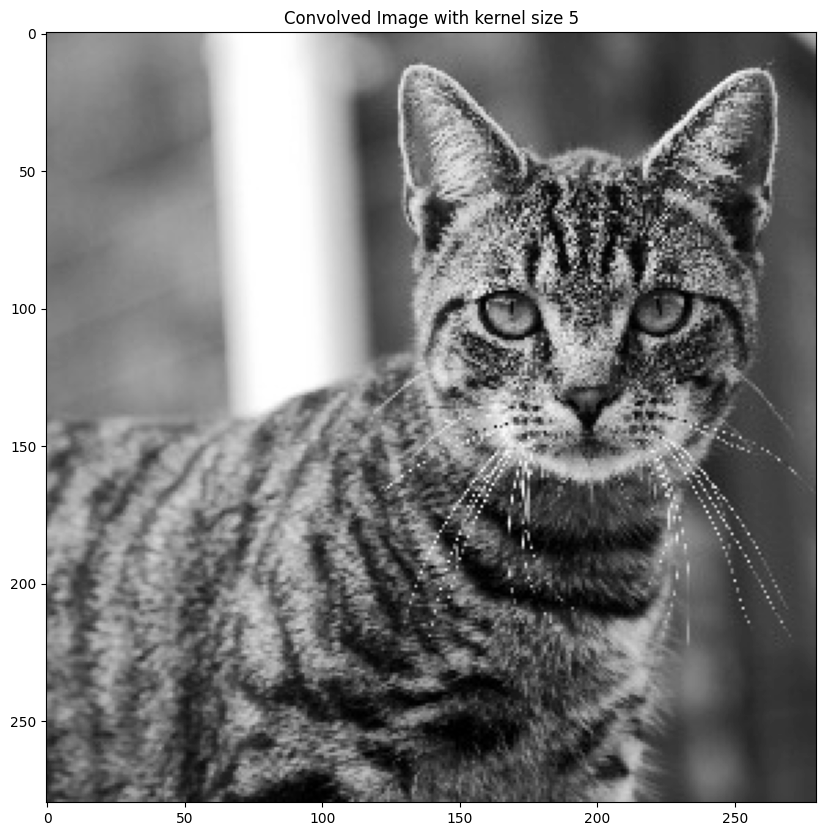

In [46]:
input_image = cv2.imread("assets/cat.jpeg")
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * 1 / 16 # Gaussian Blur Kernel with std = 1, mean = 0, normalized to sum to 1
# gaussian blur kernel: blurring images and reducing noise
# gaussian kernerl: https://en.wikipedia.org/wiki/Gaussian_blur

print("The kernel is of shape ", kernel.shape)
print(kernel)

fig = plt.figure(figsize=(10, 10))
plt.title("Convolved Image with kernel size 5")
plt.imshow(input_image_gray,cmap='gray')

Original input image shape :  (280, 280, 1)
Padded input image shape :  (282, 282, 1)
Convoluted output size :  (280, 280, 1)
Total time taken(sec) :  0.9501745700836182
-----------------------------------------------------------------------


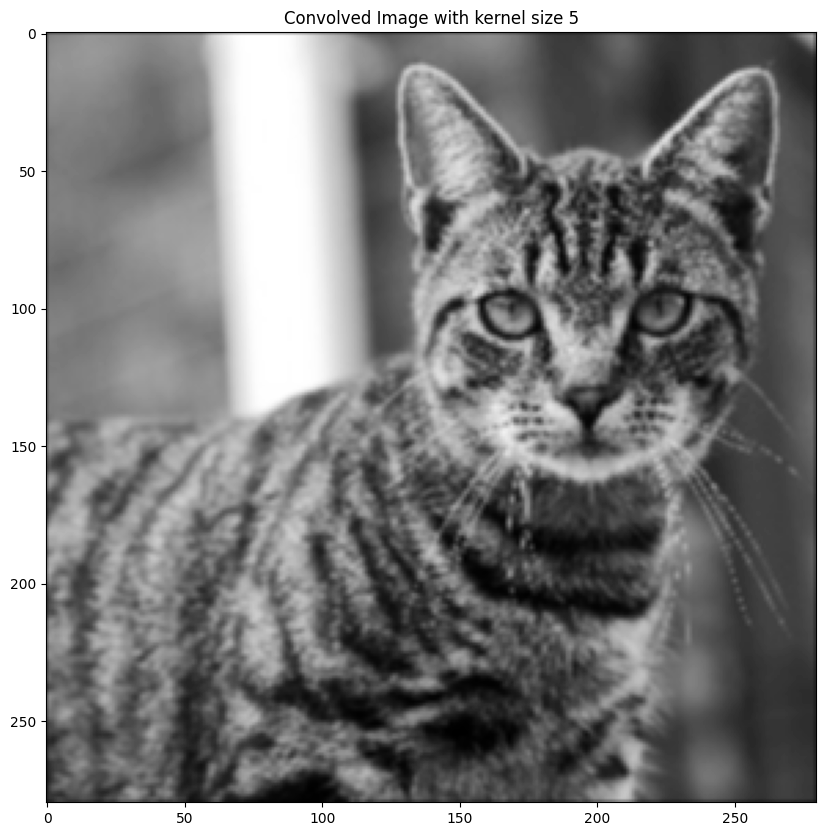

In [47]:
#Perform convolution
start_time = time.time()
conv_image = conv2D(input_image_gray, kernel = kernel, padding = 1, stride = 1)
print("Total time taken(sec) : ", time.time() - start_time)
print("-----------------------------------------------------------------------")
fig = plt.figure(figsize=(10, 10))
plt.title("Convolved Image with kernel size 5")
plt.imshow(conv_image.squeeze(), cmap='gray')

### Function to generate a Gaussian kernel

In [48]:
def gaussian_kernel2D(size = 5, sigma = 10):
    x = np.linspace(-(size - 1) / 2., (size - 1) / 2., size) # create a 1D array of size 'size' with values from -(size - 1) / 2 to (size - 1) / 2
    gaussian = np.exp(-0.5 * np.square(x) / np.square(sigma)) / (sigma * np.sqrt(2 * np.pi))
    kernel = np.outer(gaussian, gaussian) # outer product of two vectors
    return kernel

### Convolution using OpenCV built-in function

Total time taken(sec) :  0.01673746109008789
-----------------------------------------------------------------------


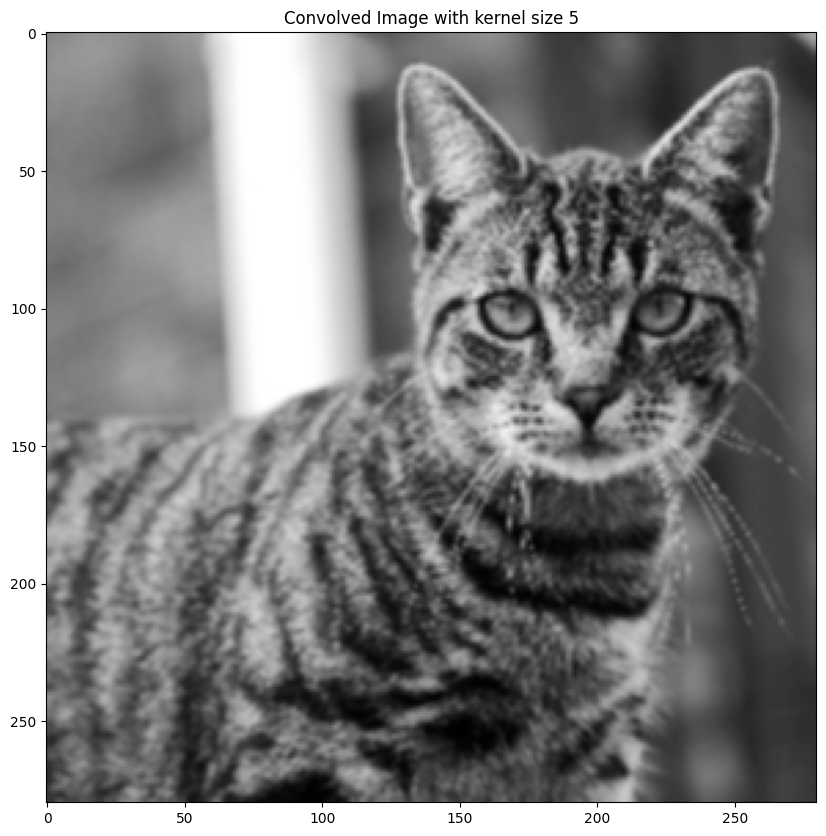

In [49]:
# gaussian2D_kernel =  gaussian_kernel2D(size = 3, sigma = 10)
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * 1 / 16
start_time = time.time()
conv_result = cv2.filter2D(src=input_image_gray, ddepth=-1, kernel=kernel)
# conv_result = cv2.filter2D(src=input_image_gray, ddepth=-1, kernel=gaussian2D_kernel)
print("Total time taken(sec) : ", time.time() - start_time)
print("-----------------------------------------------------------------------")

# create figure
fig = plt.figure(figsize=(10, 10))
plt.title("Convolved Image with kernel size 5")
plt.imshow(conv_result.squeeze(), cmap = "gray")

Here are the parameters for `cv2.filter2D`:

1. `'src'` – The source image to apply the filter on.
2. `'dst'` – Name of the output image after applying the filter.
3. `'Ddepth'` – Depth of the output image (-1 will give the output image depth as same as the input image)
4. `'kernel'` – The 2d matrix we want the image to convolve with.


## Exercise #4
### Convolution
- Blur the 'lena.jpg' by convoluting the image with any of the blurring filters (write your own).  
You can use Opencv built-in function for convolution operation